# Prepping data

In [565]:
# startColumn = 220 
# numMovies = 2
# pruningMode = 1

In [566]:
import numpy.random as npr
import numpy as np
import pandas as pd

# plotting and viz libraries:
import seaborn as sns
import matplotlib.pyplot as plt

# stats libraries
import scipy.stats as stats
import pingouin as pg
import statsmodels.formula.api as smf
from pingouin import kruskal
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.oneway import effectsize_oneway
from statsmodels.stats.power import FTestAnovaPower

In [567]:
df = pd.read_csv('movieReplicationSet.csv')

In [568]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [569]:
print(df.apply(lambda col: col.unique()))

The Life of David Gale (2003)                                              [nan, 3.0, 3.5, 2.5, 1.5, 4.0, 1.0, 2.0, 0.5, ...
Wing Commander (1999)                                                      [nan, 3.0, 1.5, 2.0, 3.5, 4.0, 1.0, 0.5, 0.0, ...
Django Unchained (2012)                                                    [4.0, 1.5, nan, 2.0, 3.5, 2.5, 3.0, 1.0, 0.5, ...
Alien (1979)                                                               [nan, 2.5, 3.0, 0.0, 1.0, 4.0, 1.5, 0.5, 2.0, ...
Indiana Jones and the Last Crusade (1989)                                  [3.0, nan, 0.5, 2.0, 2.5, 3.5, 4.0, 1.5, 0.0, ...
                                                                                                 ...                        
Movies change my position on social economic or political issues                         [5.0, 3.0, 4.0, 1.0, 2.0, 6.0, nan]
When watching movies things get so intense that I have to stop watching                  [1.0, 2.0, 4.0, 3.0, 5.0, 6.0, nan]


In [570]:
df.shape

(1097, 477)

# Q5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

In [571]:
df.columns.get_indexer(['The Lion King (1994)'])

array([220])

## Method 1 (ds)

In [572]:
only_children = pd.to_numeric(df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== 1]['The Lion King (1994)'],errors='coerce').values
siblings = pd.to_numeric(df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== -1]['The Lion King (1994)'],errors='coerce').values

In [573]:
# elementwise removal of nans

only_children = only_children[np.isfinite(only_children)] 
siblings = siblings[np.isfinite(siblings)]

In [574]:
only_children

array([4. , 4. , 4. , 3.5, 3.5, 4. , 4. , 4. , 3.5, 4. , 2. , 4. , 4. ,
       4. , 4. , 4. , 3.5, 3. , 2.5, 3. , 4. , 3. , 4. , 4. , 1. , 2. ,
       4. , 3. , 3.5, 1.5, 3.5, 3.5, 4. , 3. , 3. , 3. , 0.5, 4. , 4. ,
       4. , 3.5, 4. , 4. , 3. , 3. , 3. , 3. , 4. , 3.5, 3.5, 4. , 2.5,
       4. , 3. , 4. , 4. , 4. , 3. , 3.5, 3. , 1.5, 3. , 2.5, 2.5, 4. ,
       4. , 4. , 3.5, 2.5, 4. , 4. , 3.5, 2. , 0.5, 3.5, 3. , 4. , 4. ,
       3.5, 4. , 4. , 2.5, 2. , 3.5, 4. , 2.5, 4. , 4. , 4. , 3. , 4. ,
       0. , 2.5, 3. , 4. , 3.5, 4. , 4. , 3.5, 4. , 3. , 4. , 3. , 2. ,
       4. , 3. , 3. , 4. , 3.5, 4. , 3.5, 3. , 3. , 3.5, 3. , 0.5, 4. ,
       4. , 4. , 2.5, 4. , 3. , 4. , 3.5, 3.5, 3.5, 4. , 2. , 4. , 3.5,
       4. , 3. , 3. , 3. , 4. , 2.5, 4. , 4. , 4. , 4. , 2.5, 3.5, 4. ,
       4. , 3. , 2.5, 3. , 3.5, 4. , 3.5, 3. ])

In [575]:
len(only_children)

151

In [576]:
len(siblings)

10

In [577]:
siblings

array([4. , 3.5, 1.5, 4. , 4. , 4. , 4. , 4. , 3.5, 2. ])

In [578]:
result = pg.homoscedasticity(data=[only_children, siblings], method='levene')
print(result)

               W      pval  equal_var
levene  0.039399  0.842914       True


In [579]:
combinedData = np.transpose(np.array([only_children,siblings], dtype="object"))

In [580]:
numGroups = 2

descriptivesContainer = np.empty([numGroups,4])
descriptivesContainer[:] = np.NaN 

In [581]:
for ii in range(numGroups):
    descriptivesContainer[ii,0] = np.mean(combinedData[ii]) # mu
    descriptivesContainer[ii,1] = np.std(combinedData[ii]) # sigma
    descriptivesContainer[ii,2] = len(combinedData[ii]) # n
    descriptivesContainer[ii,3] = descriptivesContainer[ii,1]/np.sqrt(descriptivesContainer[ii,2]) # sem

In [582]:
descriptivesContainer

array([[3.34768212e+00, 8.13774985e-01, 1.51000000e+02, 6.62240691e-02],
       [3.45000000e+00, 8.78919792e-01, 1.00000000e+01, 2.77938842e-01]])

In [583]:
t1, p1 = stats.ttest_ind(combinedData[0],combinedData[1])

In [584]:
t1

-0.38069226926591343

In [585]:
p1

0.7039397393256672

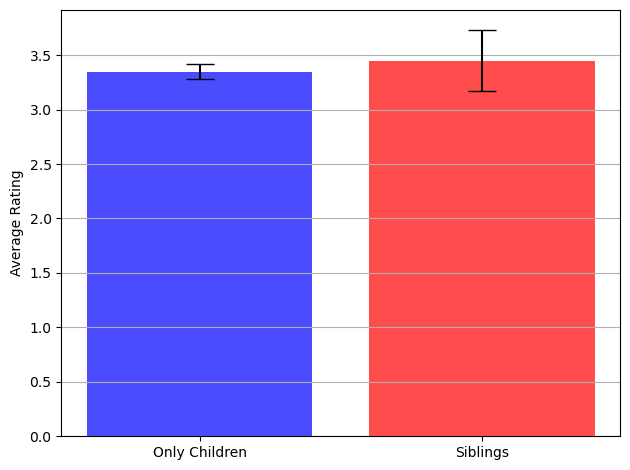

In [586]:
mean_only_children = only_children.mean()
mean_siblings = siblings.mean()

sem_only_children = only_children.std() / np.sqrt(len(only_children))
sem_siblings = siblings.std() / np.sqrt(len(siblings))

# Plotting
labels = ['Only Children', 'Siblings']
means = [mean_only_children, mean_siblings]
errors = [sem_only_children, sem_siblings]

plt.bar(labels, means, yerr=errors, color=['blue', 'red'], alpha=0.7, capsize=10)
plt.ylabel('Average Rating')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

## Method 2 (psych)

In [587]:
only_children_a = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== 1]['The Lion King (1994)']
                        
siblings_a = df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== -1]['The Lion King (1994)']

In [588]:
two_sample_results = pg.ttest(x=only_children_a, y=siblings_a, correction=False)
two_sample_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380692,159,two-sided,0.70394,"[-0.63, 0.43]",0.124308,0.335,0.066559


In [589]:
only_children_a

2       4.0
4       4.0
5       4.0
22      3.5
33      3.5
       ... 
1058    3.0
1068    3.5
1075    4.0
1076    3.5
1088    3.0
Name: The Lion King (1994), Length: 177, dtype: float64

# Q6: What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

In [590]:
#get column names

movie_titles = list(df.columns.values[0:400])

In [591]:
len(movie_titles)

400

In [592]:
# create empty list for significant results

sig_results = []

In [593]:
for title in movie_titles:
    
    only_children_a = pd.to_numeric(df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== 1][title],errors='coerce').values
    siblings_a = pd.to_numeric(df[df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']== -1][title],errors='coerce').values
    
    
    # elementwise removal of nans
    only_children_a = only_children_a[np.isfinite(only_children_a)] 
    siblings_a = siblings_a[np.isfinite(siblings_a)]
    
    combinedData = np.transpose(np.array([only_children_a,siblings_a], dtype="object"))
    
    #test for homogeneity; excluding normality bc Welch's t test also requires normality
    variance = pg.homoscedasticity(data=[only_children_a, siblings_a], method='levene')
    
    #if equal variance, Student/independent samples t test:
    if variance.iloc[0, 2] == True: 
    
        t1,p1 = stats.ttest_ind(combinedData[0],combinedData[1])
    
        if p1 < 0.005:
            
            sig_results.append(title)
            
    #if not equal variance, Welch's t test
    else: 
        
        welch_results = stats.ttest_ind(only_children_a, siblings_a, equal_var = False)
        
        if welch_results[1] < 0.005:
                
            sig_results.append(title)
        


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/sci

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.9/site-packages/num

In [594]:
sig_results

['Just Married (2003)', 'The Mummy Returns (2001)']

In [595]:
#1.89% of the movies exhibit an only-child effect

only_child_proportion = len(sig_results)/len(movie_titles)
only_child_proportion

0.005

# Q10: There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]


In [596]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']

In [597]:
for f in franchises:
    
    #new df based on each franchise
    series = df.columns.str.contains(f)
    series_loc = [i for i, x in enumerate(series) if x]
    df_series = df.iloc[:, series_loc]
    df_series_melted = pd.melt(df_series, value_vars = df_series.columns).dropna()
    
    #check for normality and homoscedasticity with Shapiro-Wilk tests of normality (if non-significant, assume normality bc null hypothesis is the distribution is normal) and the levene's test of homogeneity
    W, p = stats.shapiro(x=df_series_melted['value'])
    variance = pg.homoscedasticity(df_series_melted, 
                    dv='value', 
                    group='variable', 
                    method='levene')
    
    #decide which test to run between anova & kruskal-wallis based on normality and variance
    #only when both assumptions are met ANOVA will be conducted, if one or more of the assumptions is violated, then kruskal-wallis
    
    if variance.iloc[0,2] == True and p > 0.05:
        
        #ANOVA
        oneway_model = smf.ols(formula = 'value ~ C(variable)', data=df_series_melted)
        oneway_model = oneway_model.fit()
        
        anova_table = sm.stats.anova_lm(oneway_model, typ=1)
        print(anova_table)
        
        df_bet = anova_table['df'][0]
        df_within = anova_table['df'][1]

        F = anova_table['F'][0]
        p = anova_table['PR(>F)'][0]
        
        if p < 0.005:
            print(f'For {f}, F({df_bet}, {df_within}) = {np.round(F,2)}, p = {np.round(p,7)}. The results are significant. ')
        else: 
            print(f'For {f}, F({df_bet}, {df_within}) = {np.round(F,2)}, p = {np.round(p,7)}. The results are not significant. ')

        #post hoc pairwise comparison
        tukey_comparisons = pairwise_tukeyhsd(endog = df_series_melted['value'],
                                              groups = df_series_melted['variable'],
                                              alpha = .005)

        print(tukey_comparisons.summary())
        
        
    else: 
        
        kruskal_results = kruskal(data=df_series_melted, dv='value', between='variable')
        
        if kruskal_results.iloc[0, 3] < 0.005: 
            print(f'For {f}, the p value for the kruskal-wallis is significant at {kruskal_results.iloc[0, 3]}')
        else:
            print(f'For {f}, the p value for the kruskal-wallis is not significant at {kruskal_results.iloc[0, 3]}')
        #add another if later
        
        #post hoc pairwise comparison
        #tukey_comparisons = pairwise_tukeyhsd(endog = df_series_melted['value'],
#                                               groups = df_series_melted['variable'],
#                                               alpha = .005)

#         print(tukey_comparisons.summary())

For Star Wars, the p value for the kruskal-wallis is significant at 8.01647736660335e-48
For Harry Potter, the p value for the kruskal-wallis is not significant at 0.34331950837289205
For The Matrix, the p value for the kruskal-wallis is significant at 3.123651788077413e-11
For Indiana Jones, the p value for the kruskal-wallis is significant at 6.272775639798956e-10
For Jurassic Park, the p value for the kruskal-wallis is significant at 7.636930084365822e-11
For Pirates of the Caribbean, the p value for the kruskal-wallis is significant at 3.2901287079094474e-05
For Toy Story, the p value for the kruskal-wallis is significant at 5.065805156542464e-06
For Batman, the p value for the kruskal-wallis is significant at 4.2252969509030006e-42


## experiment code

In [496]:
#experiment code
star_wars = df.columns.str.contains('Star Wars')

In [497]:
star_wars_loc = [i for i, x in enumerate(star_wars) if x]

In [498]:
star_wars_loc

[21, 93, 174, 273, 336, 342]

In [499]:
#df.columns[21] - how you get column header

In [500]:
# oneway_model = smf.ols(formula = 'response ~ C(exp_group)', data=df)
# oneway_model = oneway_model.fit()

In [501]:
df_sw = df.iloc[:, star_wars_loc]
df_sw

,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode VII - The Force Awakens (2015),Star Wars: Episode VI - The Return of the Jedi (1983)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0.0,4.0,0.0,2.5,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1092,4.0,3.0,4.0,NaN,4.0,4.0
1093,4.0,3.0,3.5,4.0,4.0,4.0
1094,3.0,1.5,3.0,2.5,4.0,4.0
1095,NaN,4.0,4.0,4.0,NaN,4.0


In [502]:
df_sw.columns

Index(['Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode II - Attack of the Clones (2002)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode 1 - The Phantom Menace (1999)',
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'Star Wars: Episode VI - The Return of the Jedi (1983)'],
      dtype='object')

In [503]:
df_sw_melted = pd.melt(df_sw, value_vars = df_sw.columns)

df_sw_melted

,variable,value
0,Star Wars: Episode IV - A New Hope (1977),NaN
1,Star Wars: Episode IV - A New Hope (1977),NaN
2,Star Wars: Episode IV - A New Hope (1977),NaN
3,Star Wars: Episode IV - A New Hope (1977),4.0
4,Star Wars: Episode IV - A New Hope (1977),NaN
...,...,...
6577,Star Wars: Episode VI - The Return of the Jedi...,4.0
6578,Star Wars: Episode VI - The Return of the Jedi...,4.0
6579,Star Wars: Episode VI - The Return of the Jedi...,4.0
6580,Star Wars: Episode VI - The Return of the Jedi...,4.0


In [504]:
df_sw_melted = df_sw_melted.dropna()

In [505]:
df_sw_melted

,variable,value
3,Star Wars: Episode IV - A New Hope (1977),4.0
5,Star Wars: Episode IV - A New Hope (1977),4.0
7,Star Wars: Episode IV - A New Hope (1977),3.0
9,Star Wars: Episode IV - A New Hope (1977),4.0
10,Star Wars: Episode IV - A New Hope (1977),4.0
...,...,...
6575,Star Wars: Episode VI - The Return of the Jedi...,4.0
6577,Star Wars: Episode VI - The Return of the Jedi...,4.0
6578,Star Wars: Episode VI - The Return of the Jedi...,4.0
6579,Star Wars: Episode VI - The Return of the Jedi...,4.0


In [506]:
df_sw_melted['variable'].unique()

array(['Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode II - Attack of the Clones (2002)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode 1 - The Phantom Menace (1999)',
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'Star Wars: Episode VI - The Return of the Jedi (1983)'],
      dtype=object)

In [507]:
oneway_model = smf.ols(formula = 'value ~ C(variable)', data=df_sw_melted)
oneway_model = oneway_model.fit()

In [508]:
anova_table = sm.stats.anova_lm(oneway_model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),5.0,232.582648,46.516530,45.645133,1.525267e-45
Residual,2953.0,3009.374770,1.019091,NaN,NaN


In [509]:
df_bet = anova_table['df'][0]
df_within = anova_table['df'][1]

F = anova_table['F'][0]
p = anova_table['PR(>F)'][0]


print(f'F({df_bet}, {df_within}) = {np.round(F,2)}, p = {np.round(p,7)}')

F(5.0, 2953.0) = 45.65, p = 0.0


In [510]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_comparisons = pairwise_tukeyhsd(endog = df_sw_melted['value'],
                                      groups = df_sw_melted['variable'],
                                      alpha = .005)


tukey_comparisons.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode II - Attack of the Clones (2002),-0.0404,0.9891,-0.2703,0.1895,False
Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode IV - A New Hope (1977),0.4828,0.0,0.2542,0.7114,True
Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode V - The Empire Strikes Back (1980),0.6083,0.0,0.3737,0.8428,True
Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode VI - The Return of the Jedi (1983),0.5419,0.0,0.3029,0.7809,True
Star Wars: Episode 1 - The Phantom Menace (1999),Star Wars: Episode VII - The Force Awakens (2015),0.6297,0.0,0.3946,0.8647,True
Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode IV - A New Hope (1977),0.5232,0.0,0.3042,0.7422,True
Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode V - The Empire Strikes Back (1980),0.6486,0.0,0.4234,0.8739,True
Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode VI - The Return of the Jedi (1983),0.5823,0.0,0.3525,0.8122,True
Star Wars: Episode II - Attack of the Clones (2002),Star Wars: Episode VII - The Force Awakens (2015),0.6701,0.0,0.4443,0.8958,True
Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),0.1254,0.3451,-0.0985,0.3494,False


In [511]:
kruskal(data=df_sw_melted, dv='value', between='variable')

,Source,ddof1,H,p-unc
Kruskal,variable,5,230.584175,8.016477e-48


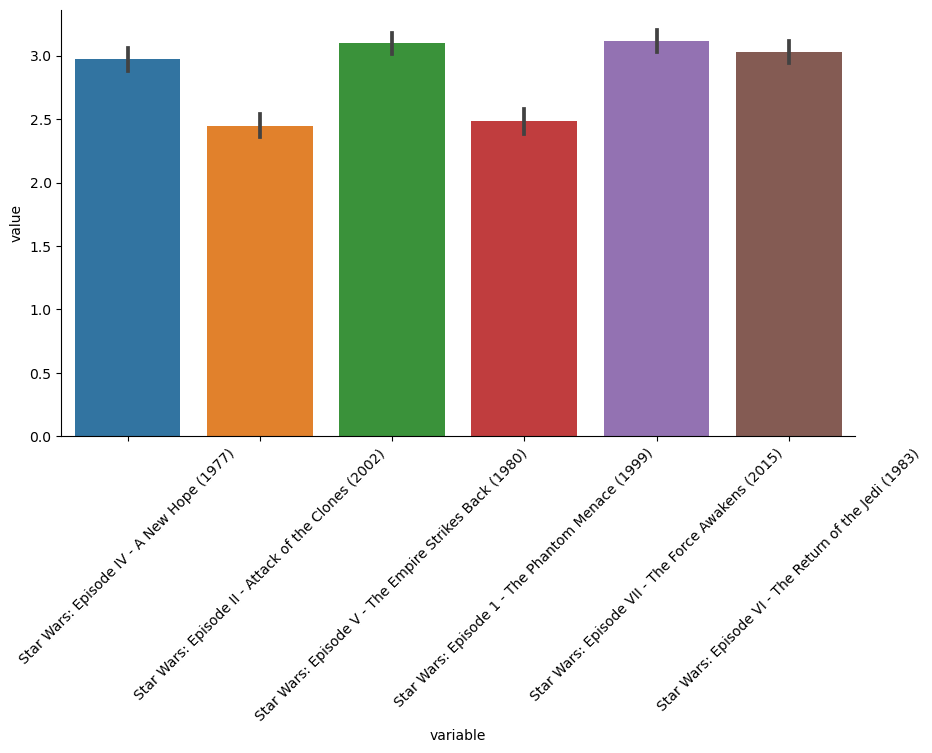

In [512]:
catplot = sns.catplot(x='variable', y='value', data=df_sw_melted, kind='bar', aspect=2)
catplot.set_xticklabels(rotation=45)

In [513]:
W, p = stats.shapiro(x=df_sw_melted['value'])
print(f"The value of W is {W}, p={p}")

The value of W is 0.8907539248466492, p=1.2987234167362405e-41


In [514]:
result = pg.homoscedasticity(df_sw_melted, 
                    dv='value', 
                    group='variable', 
                    method='levene')

In [515]:
result.iloc[0,2]

False

In [516]:
result

,W,pval,equal_var
levene,7.020806,0.000002,False


In [517]:
aov = pg.anova(dv='value', between='variable', data=df_sw_melted,
               detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,variable,232.582648,5,46.516530,45.645133,1.525267e-45,0.071741
1,Within,3009.374770,2953,1.019091,NaN,NaN,NaN


# Extra Credit

In [524]:
df_movies = df[df.columns.values[0:400]]

In [525]:
df_self_report = df[df.columns.values[400:]]

In [526]:
df_movies

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [528]:
df_self_report.columns

Index(['I enjoy driving fast', 'I enjoy rollercoasters ',
       'Have you ever bungee-jumped?', 'I enjoy impulse shopping',
       'I sometimes go out on weeknights even if I have work to do',
       'I enjoy doing things without too much planning ',
       'Have you ever been rock climbing?',
       'I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve',
       'I enjoy going to large music or dance festivals ',
       'I enjoy watching horror movies', 'No risk - No fun',
       'I like to be surprised even if it startles or scares me',
       'Have you ever parachuted?', 'I enjoy haunted houses',
       'I had a sheltered upbringing', 'My life is very stressful',
       'I value my life to be well ordered and predictable',
       'Have you ridden a motorcycle?', 'Have you gambled or bet for money?',
       'Have you ever been sky-diving?', 'Is talkative',
       'Tends to find fault with others', 'Does a thorough job',
       'Is depressed/Blue', 'Is o

In [530]:
df_movies_melted = pd.melt(df_movies, value_vars = df_movies.columns).dropna()
df_movies_melted

,variable,value
5,The Life of David Gale (2003),3.0
7,The Life of David Gale (2003),3.5
22,The Life of David Gale (2003),2.5
45,The Life of David Gale (2003),1.5
61,The Life of David Gale (2003),2.5
...,...,...
438719,Look Who's Talking (1989),2.5
438735,Look Who's Talking (1989),2.5
438756,Look Who's Talking (1989),2.0
438781,Look Who's Talking (1989),1.0
